<a href="https://colab.research.google.com/github/Kachi031/SQL-Wholesale/blob/main/Copy_of_adhoclab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations!

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail!

In [38]:
# run this codeblock first! (rerun everytime you begin coding)
!pip install -q gdown

import gdown, os

file_url='https://drive.google.com/file/d/17mL24gOETJL8YiyPBV2lVMjTHBooUT1m/view?usp=sharing'
out_path  = "Market.db"

gdown.download(url=file_url, output=out_path, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=17mL24gOETJL8YiyPBV2lVMjTHBooUT1m
To: /content/Market.db
100%|██████████| 65.5k/65.5k [00:00<00:00, 63.8MB/s]


'Market.db'

In [3]:
import sqlite3

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect("Market.db")

# TODO: Set up the cursor
cur = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [5]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
            SELECT COUNT(*)
            FROM Products
            WHERE Price < 10;
""")

rows = cur.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [43]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
SELECT Country, COUNT(Country) AS NumberOfSuppliers
FROM Suppliers
GROUP BY Country
ORDER BY NumberOfSuppliers DESC;
""")


# TODO: Fetch your list of tuples and print it out
sup_rows = cur.fetchall()
print(sup_rows)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


        Country  Frequency
0           USA          4
1       Germany          3
2        France          3
3            UK          2
4        Sweden          2
5         Japan          2
6         Italy          2
7        Canada          2
8     Australia          2
9         Spain          1
10    Singapore          1
11       Norway          1
12  Netherlands          1
13      Finland          1
14      Denmark          1
15       Brazil          1


/tmp/ipython-input-7-4109631804.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Country', data=df, palette='viridis')


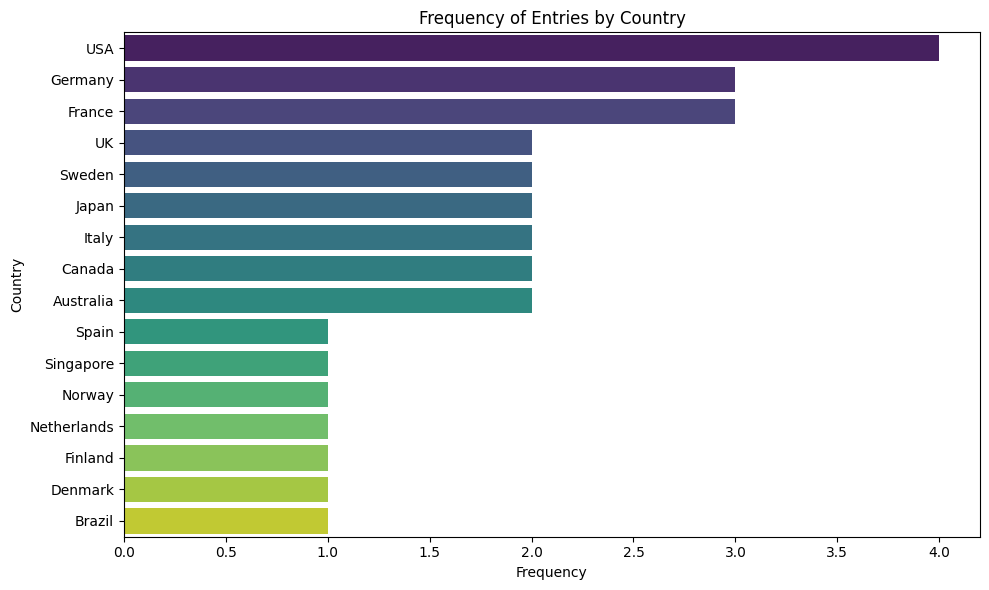

In [7]:
# TODO: Convert your list of tuples to a dataframe

df = pd.DataFrame(rows, columns=['Country', 'Frequency'])

print(df)

# TODO: Generate a visualization on this dataframe

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Country', data=df, palette='viridis')
plt.title('Frequency of Entries by Country')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [42]:
# TODO: Write a SQL query which will answer the question above.

cur.execute("""
SELECT Country, COUNT(*) AS NumberOfCustomers
FROM Customers
GROUP BY Country
ORDER BY NumberOfCustomers DESC;
""")

# TODO: Fetch your list of tuples and print it out
cust_rows = cur.fetchall()
print(cust_rows)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


/tmp/ipython-input-9-2753068498.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency_2', y='Country', data=df, palette='viridis')


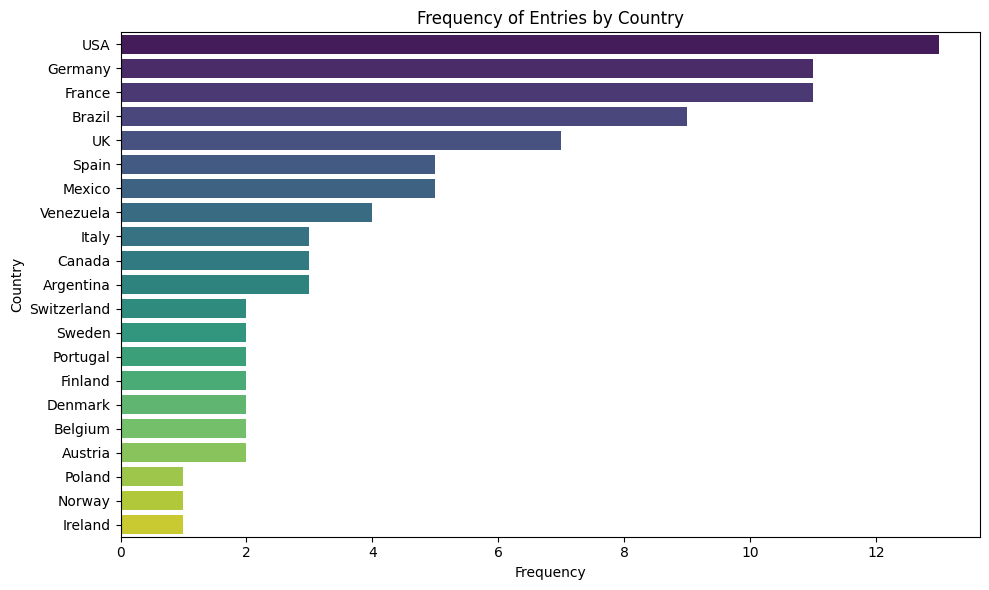

In [9]:
# TODO: Convert your list of tuples to a dataframe

df = pd.DataFrame(rows, columns=['Country', 'Frequency_2'])


# TODO: Generate a visualization on this dataframe

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency_2', y='Country', data=df, palette='viridis')
plt.title('Frequency of Entries by Country')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [30]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
SELECT p.ProductName, SUM(od.Quantity) AS TotalQuantity
FROM OrderDetails od
JOIN Products p
    ON p.ProductID = od.ProductID
GROUP BY p.ProductName
ORDER BY TotalQuantity ASC
LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
Q_rows = cur.fetchall()
print(rows)

[('USA', 5), ('France', 4), ('Germany', 2), ('Argentina', 2), ('UK', 1), ('Spain', 1), ('Canada', 1), ('Belgium', 1)]


                        ProductName  Total Quantity
0         Laughing Lumberjack Lager               5
1                       Røgede sild              15
2               Gustaf's Knäckebröd              18
3                   Mishi Kobe Niku              20
4                      Genen Shouyu              25
5   Uncle Bob's Organic Dried Pears              25
6         Queso Manchego La Pastora              27
7      Grandma's Boysenberry Spread              36
8                        Gravad lax              39
9                        Röd Kaviar              45
10                         Filo Mix              48
11               Mascarpone Fabioli              52
12                        Chocolade              70
13                 Valkoinen suklaa              70
14          NuNuCa Nuß-Nougat-Creme              71
15    Singaporean Hokkien Fried Mee              77
16                    Aniseed Syrup              80
17                            Ikura              85
18        Lo

/tmp/ipython-input-11-344416467.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Quantity', y='ProductName', data=df, palette='viridis')


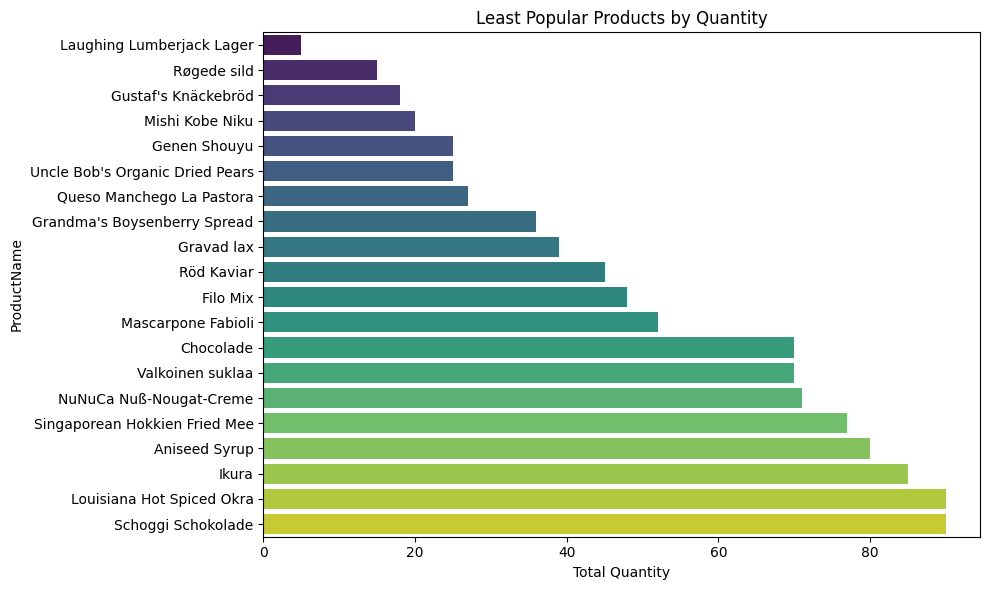

In [11]:
# TODO: Convert your list of tuples to a dataframe

df = pd.DataFrame(rows, columns=['ProductName', 'Total Quantity'])

print(df)


# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Quantity', y='ProductName', data=df, palette='viridis')
plt.title('Least Popular Products by Quantity')
plt.xlabel('Total Quantity')
plt.ylabel('ProductName')
plt.tight_layout()
plt.show()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [31]:
# TODO: Write a SQL query which will answer the question above.

cur.execute("""
  SELECT p.ProductName, SUM(Quantity * Price) AS TotalRevenue
  FROM Products p JOIN OrderDetails od
  ON p.ProductID = od.ProductID
  GROUP BY p.ProductName
  ORDER BY TotalRevenue ASC;
""")

# TODO: Fetch your list of tuples and print it out
R_rows = cur.fetchall()
print(rows)

[('USA', 5), ('France', 4), ('Germany', 2), ('Argentina', 2), ('UK', 1), ('Spain', 1), ('Canada', 1), ('Belgium', 1)]


/tmp/ipython-input-13-1081853628.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalRevenue', y='ProductName', data=df, palette='viridis')


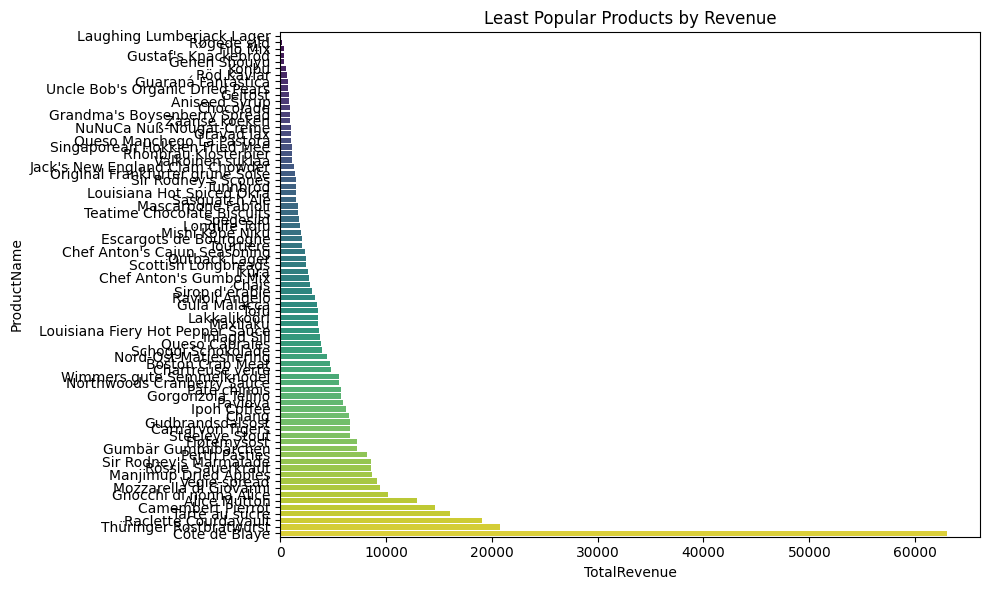

In [13]:
# TODO: Convert your list of tuples to a dataframe

df = pd.DataFrame(rows, columns=['ProductName', 'TotalRevenue'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalRevenue', y='ProductName', data=df, palette='viridis')
plt.title('Least Popular Products by Revenue')
plt.xlabel('TotalRevenue')
plt.ylabel('ProductName')
plt.tight_layout()
plt.show()

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [23]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
SELECT c.Country, COUNT(o.OrderID) AS OrdersC
FROM Customers c
JOIN Orders o
    ON c.CustomerID = o.CustomerID
GROUP BY c.Country
ORDER BY OrdersC DESC;
""")

# TODO: Fetch your list of tuples and print it out
MOrders_rows = cur.fetchall()
print(MOrders_rows)

[('USA', 29), ('Germany', 25), ('Brazil', 19), ('France', 18), ('Austria', 13), ('UK', 12), ('Venezuela', 9), ('Mexico', 9), ('Canada', 9), ('Finland', 8), ('Sweden', 7), ('Spain', 7), ('Italy', 7), ('Ireland', 6), ('Portugal', 5), ('Switzerland', 4), ('Denmark', 4), ('Belgium', 2), ('Poland', 1), ('Norway', 1), ('Argentina', 1)]


/tmp/ipython-input-15-2024200725.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OrdersC', y='Country', data=df, palette='viridis')


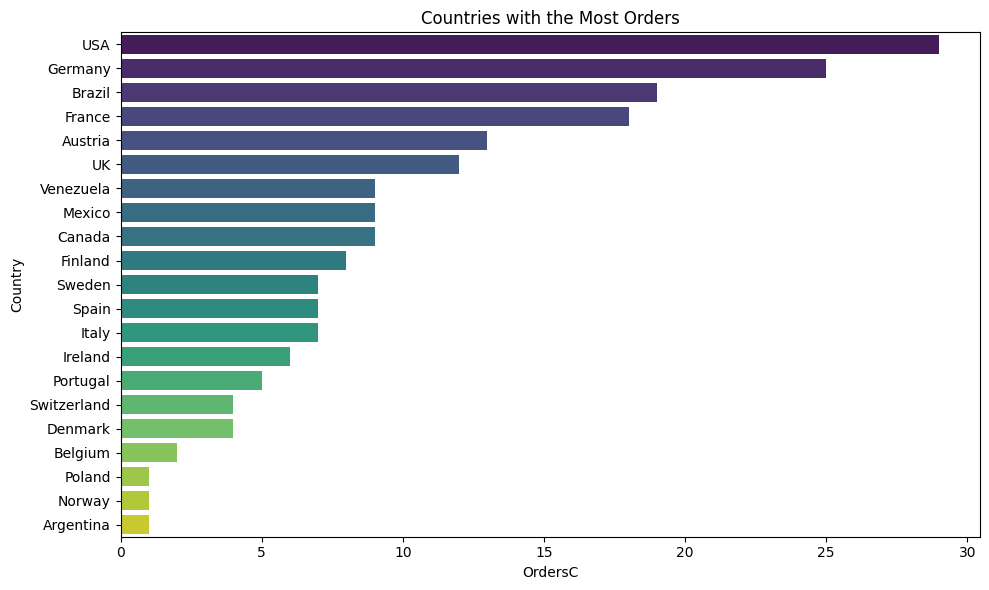

In [15]:
# TODO: Convert your list of tuples to a dataframe

df = pd.DataFrame(rows, columns=['Country', 'OrdersC'])

# TODO: Generate a visualization on this dataframe

plt.figure(figsize=(10, 6))
sns.barplot(x='OrdersC', y='Country', data=df, palette='viridis')
plt.title('Countries with the Most Orders')
plt.xlabel('OrdersC')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [25]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
SELECT c.Country, COUNT(*) AS NoOrders
FROM Customers c
LEFT JOIN Orders o
    ON c.CustomerID = o.CustomerID
WHERE o.OrderID IS NULL
GROUP BY c.Country
ORDER BY NoOrders DESC;
""")

# TODO: Fetch your list of tuples and print it out
NOrders_rows = cur.fetchall()
print(NOrders_rows)

[('USA', 5), ('France', 4), ('Germany', 2), ('Argentina', 2), ('UK', 1), ('Spain', 1), ('Canada', 1), ('Belgium', 1)]


/tmp/ipython-input-17-3733679073.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NoOrders', y='Country', data=df, palette='viridis')


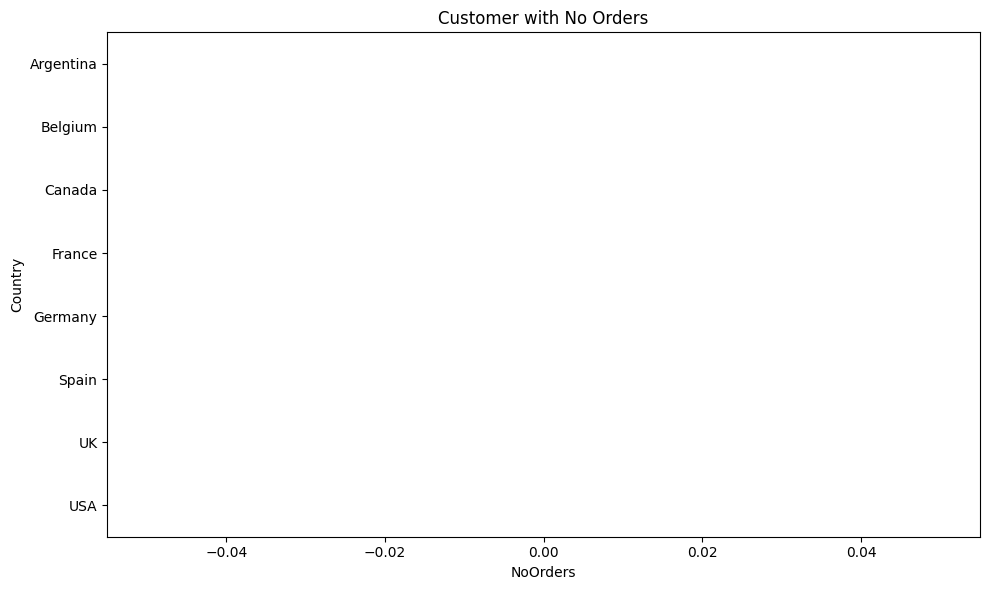

In [17]:
# TODO: Convert your list of tuples to a dataframe

df = pd.DataFrame(rows, columns=['Country', 'NoOrders'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
sns.barplot(x='NoOrders', y='Country', data=df, palette='viridis')
plt.title('Customer with No Orders')
plt.xlabel('NoOrders')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [18]:
# TODO: Write a SQL query which will answer the question above.
cur.execute("""
SELECT s.SupplierName, COUNT(o.OrderID) AS OrderCount
FROM Suppliers  s
JOIN Products p
    ON s.SupplierID = p.SupplierID
JOIN OrderDetails od
    ON p.ProductID = od.ProductID
JOIN Orders o
    ON od.OrderID = o.OrderID
GROUP BY s.SupplierName
ORDER BY OrderCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cur.fetchall()
print(rows)

[('Plutzer Lebensmittelgroßmärkte AG', 42), ('Pavlova, Ltd.', 40), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 32), ('Formaggi Fortini s.r.l.', 31), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('Pasta Buttini s.r.l.', 20), ('New Orleans Cajun Delights', 20), ('Ma Maison', 19), ('Karkki Oy', 19), ("G'day, Mate", 19), ('New England Seafood Cannery', 17), ("Mayumi's", 17), ('Leka Trading', 17), ('Bigfoot Breweries', 16), ('Heli Süßwaren GmbH & Co. KG', 15), ("Forêts d'érables", 15), ('Aux joyeux ecclésiastiques', 15), ('Svensk Sjöföda AB', 14), ('Tokyo Traders', 12), ('Refrescos Americanas LTDA', 11), ("Cooperativa de Quesos 'Las Cabras'", 11), ('Nord-Ost-Fisch Handelsgesellschaft mbH', 8), ('Lyngbysild', 8), ('PB Knäckebröd AB', 6), ("Grandma Kelly's Homestead", 6), ('Zaanse Snoepfabriek', 4), ('Escargots Nouveaux', 4)]


/tmp/ipython-input-19-4278699008.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OrderCount', y='SupplierName', data=df, palette='viridis')


Text(0, 0.5, 'SupplierName')

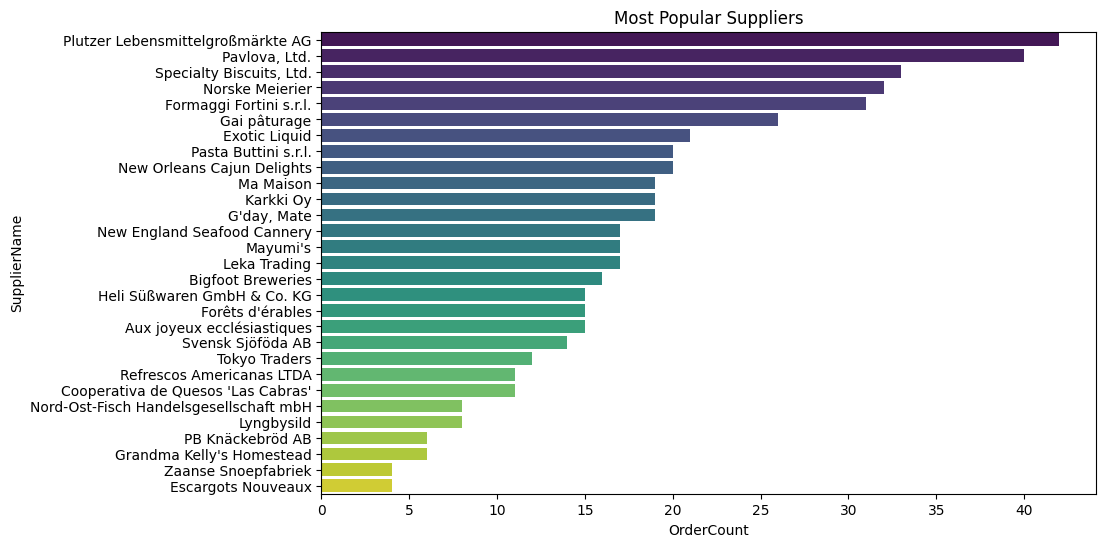

In [19]:
# TODO: Convert your list of tuples to a dataframe

df = pd.DataFrame(rows, columns=['SupplierName', 'OrderCount'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
sns.barplot(x='OrderCount', y='SupplierName', data=df, palette='viridis')
plt.title('Most Popular Suppliers')
plt.xlabel('OrderCount')
plt.ylabel('SupplierName')

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

[According to visualization in question 3, the countries that has the greatest number of customers are USA (13), Germany (11), and France (11). This correlates with the number of suppliers by country because according to question 2, more customers leads to more suppliers. In the visualization is question 2, USA had 4, Germany (3), and France (3). The visualization below displays a positive correlation between the relationship of customers and suppliers in a country.]

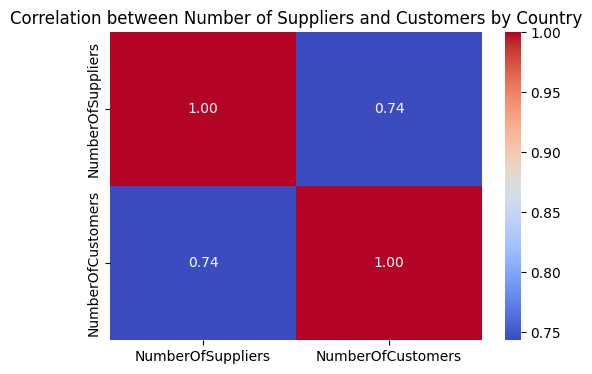

In [44]:
df_suppliers = pd.DataFrame(sup_rows, columns=["Country", "NumberOfSuppliers"])
df_customers = pd.DataFrame(cust_rows, columns=["Country", "NumberOfCustomers"])

# merge dataframes
merged_df = pd.merge(df_suppliers, df_customers, on="Country")



# Calculate correlation matrix
correlation_matrix = merged_df[["NumberOfSuppliers", "NumberOfCustomers"]].corr()
# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Number of Suppliers and Customers by Country")
plt.show()

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

[According to the visualization from Question 4, the least product by order quantity is Laughing Lumberjack Lager with an amount of 5. This correlated with revenue because according to the visualization in question 5 Laughing Lumberjack Lager has the least amount of revenue. Less popular products by quantity leads to less revenue. According to the correlation visualization below, there is a positive coefficient of .59 between the order quantity and the revenue. ]

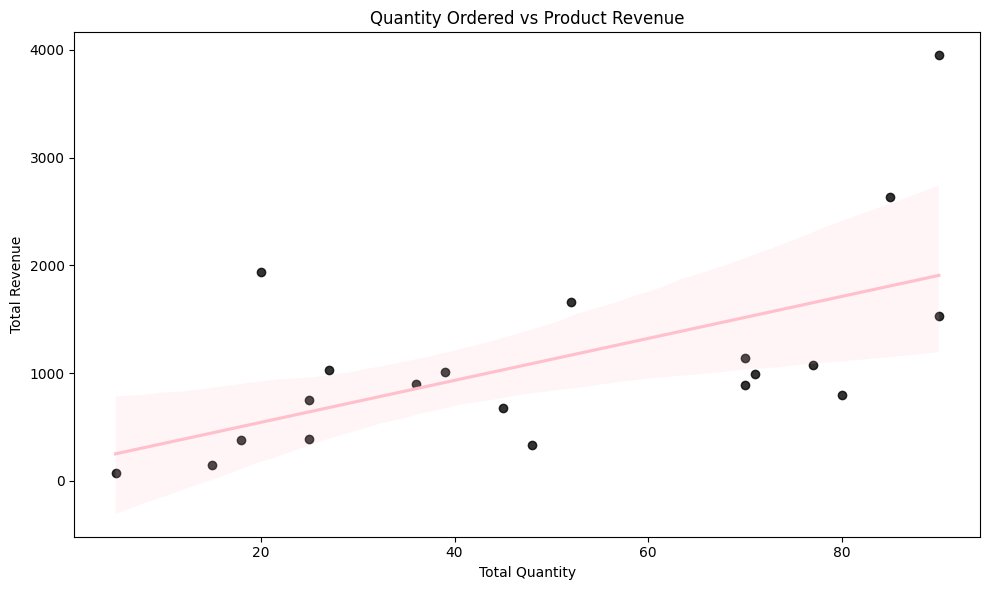

Correlation coefficient: 0.59


In [37]:
df_quantity=pd.DataFrame(Q_rows, columns=['ProductName', 'TotalQuantity'])
df_revenue=pd.DataFrame(R_rows, columns=['ProductName', 'TotalRevenue'])

# merge dataframes
df_merge = pd.merge(df_quantity, df_revenue, on="ProductName")

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_merge,
    x='TotalQuantity',
    y='TotalRevenue',
    scatter_kws={'color': 'black'},
    line_kws={'color': 'pink'}
)
plt.title('Quantity Ordered vs Product Revenue')
plt.xlabel('Total Quantity')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

correlation = df_merge["TotalQuantity"].corr(df_merge["TotalRevenue"])
print(f"Correlation coefficient: {correlation:.2f}")

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

[The country that has the most orders is the USA with a total amount of 29. According to the bar plot in question 6, Total Orders by Country, USA is number 1. This correlates with the number of customers who do not order because USA is displayed to have the most non ordering customer, 5. You can see this evidence in the visualization in question 7. Based on the visual created below, we have calculated a positive correlation of .72 ]

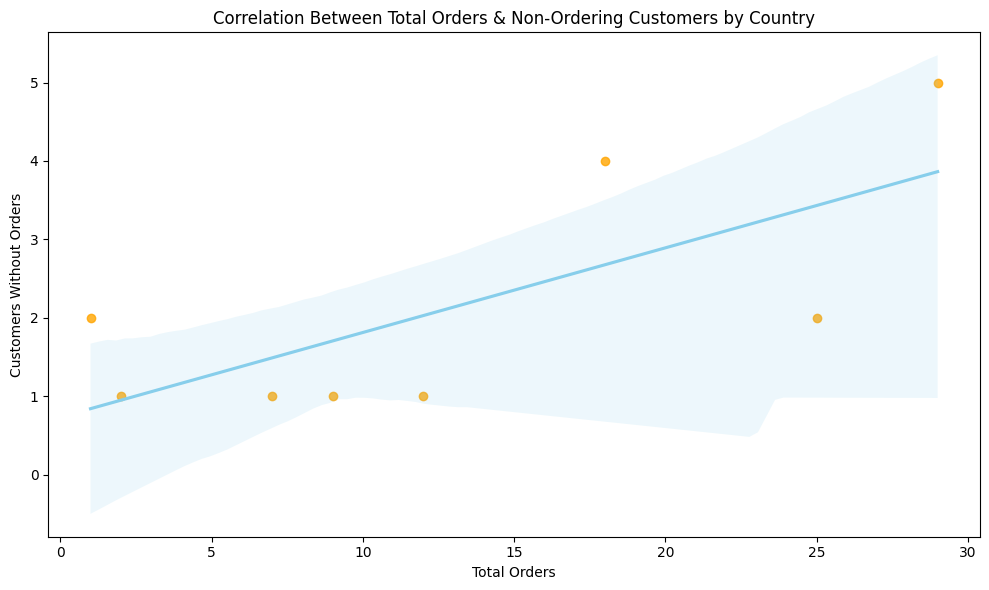

Correlation coefficient: 0.72


In [29]:
df_MOrders_rows=pd.DataFrame(MOrders_rows, columns=['Country', 'OrdersC'])
df_NOrders_rows=pd.DataFrame(NOrders_rows, columns=['Country', 'NoOrders'])

# Merge the two DataFrames on Country

df_merged_orders = pd.merge(df_MOrders_rows, df_NOrders_rows, on="Country")

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_merged_orders,
    x="OrdersC",
    y="NoOrders",
    scatter_kws={'color': 'orange'},
    line_kws={'color': 'skyblue'}
)
plt.title("Correlation Between Total Orders & Non-Ordering Customers by Country")
plt.xlabel("Total Orders")
plt.ylabel("Customers Without Orders")
plt.tight_layout()
plt.show()

correlation = df_merged_orders["OrdersC"].corr(df_merged_orders["NoOrders"])
print(f"Correlation coefficient: {correlation:.2f}")

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

[The supplier that has the most orders is Plutzer Lebensmittelgroßmärkte AG. Plutzer Lebensmittelgroßmärkte AG has total amount of 42 orders. Based on the visualization, Most Popular Suppliers, populated in question 8, it supports this evidence.]